# Varianti

Percentuali delle varianti.

> Max Pierini

Fonte: [GISAID](https://www.gisaid.org/hcov19-variants/)

***

In [1]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with urllib.request.urlopen(
    "https://mendel3.bii.a-star.edu.sg/METHODS/corona/gamma/MUTATIONS/data/config.json") as url:
    data = json.loads(url.read().decode())

In [3]:
variantOptions = data['variantOptions']

In [4]:
VAR = []
LAB = []

for variantOption in variantOptions:
    var = variantOption['value']
    lab = " ".join(variantOption['label'].split(' ')[:2])
    nat = variantOption['label'].split(' ')[-1]
    lab_nat = f"{lab} ({nat})"
    VAR.append(var)
    LAB.append(lab_nat)

In [5]:
WWW = pd.DataFrame(columns=['date', 'variant', 'pct', 'continent'])
for i, var in enumerate(VAR):
    with urllib.request.urlopen(
        "https://mendel3.bii.a-star.edu.sg/METHODS/"
        f"corona/gamma/MUTATIONS/data/weekRegion2perc_{var}.json") as url:
        data = json.loads(url.read().decode())
    for continent in data:
        name = continent['continent']
        weeklyData = continent['weeklyData']
        for weekData in weeklyData:
            year = weekData['year']
            week = weekData['weekNum']
            date = pd.to_datetime(f"{year}-{week}-0", format='%Y-%W-%w')
            pct = weekData['expSmoothingPerc']
            WWW = pd.concat([WWW, pd.DataFrame({
                'date': [date], 'pct': [pct], 'continent': [name],
                'variant': [LAB[i]]
            })])

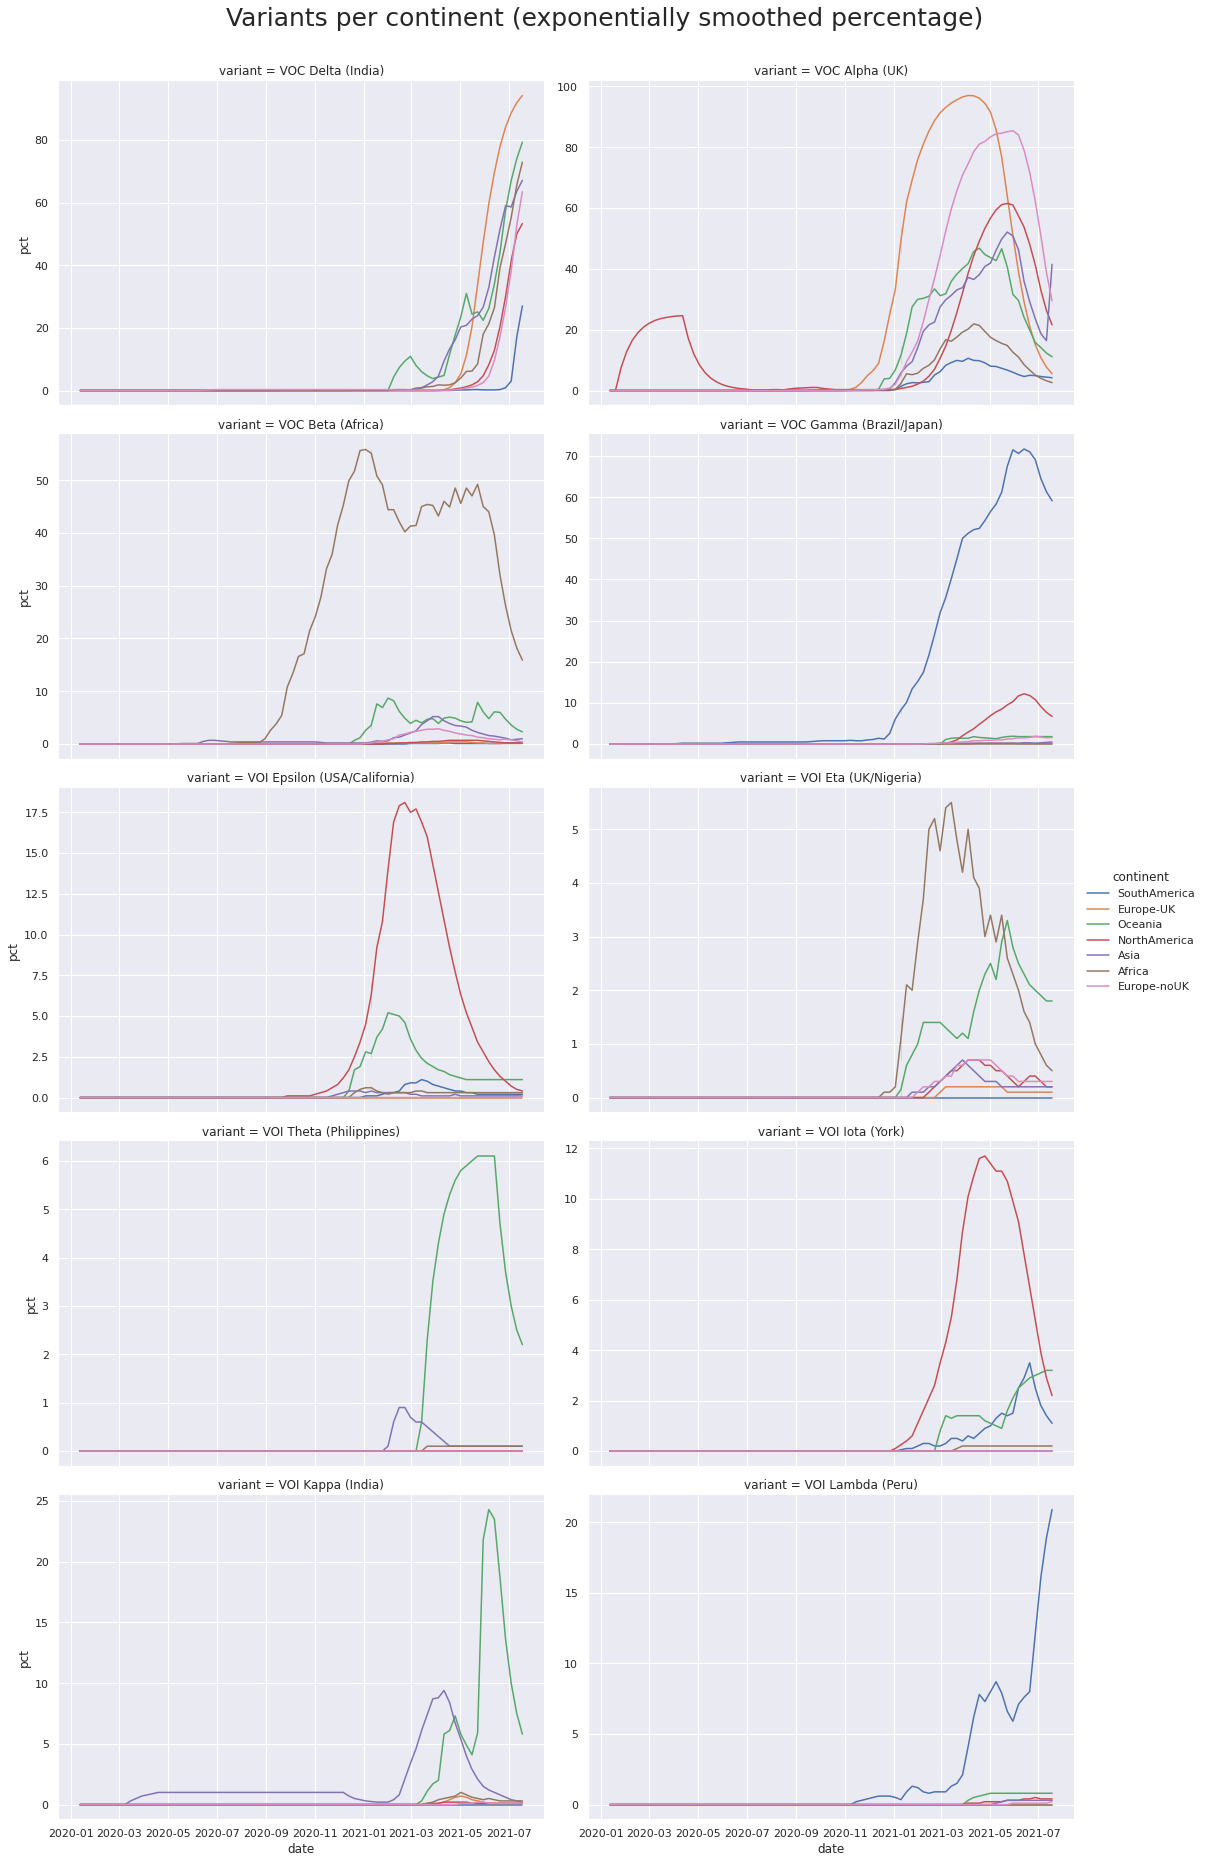

In [6]:
g = sns.relplot(
    kind='line',
    data=WWW[WWW.continent!='Global'],
    x='date', y='pct',
    hue='continent',
    col='variant',
    col_wrap=2,
    aspect=1.5,
    facet_kws=dict(sharey=False)
)
g.fig.suptitle('Variants per continent (exponentially smoothed percentage)', y=1.025, fontsize=25)
plt.show()

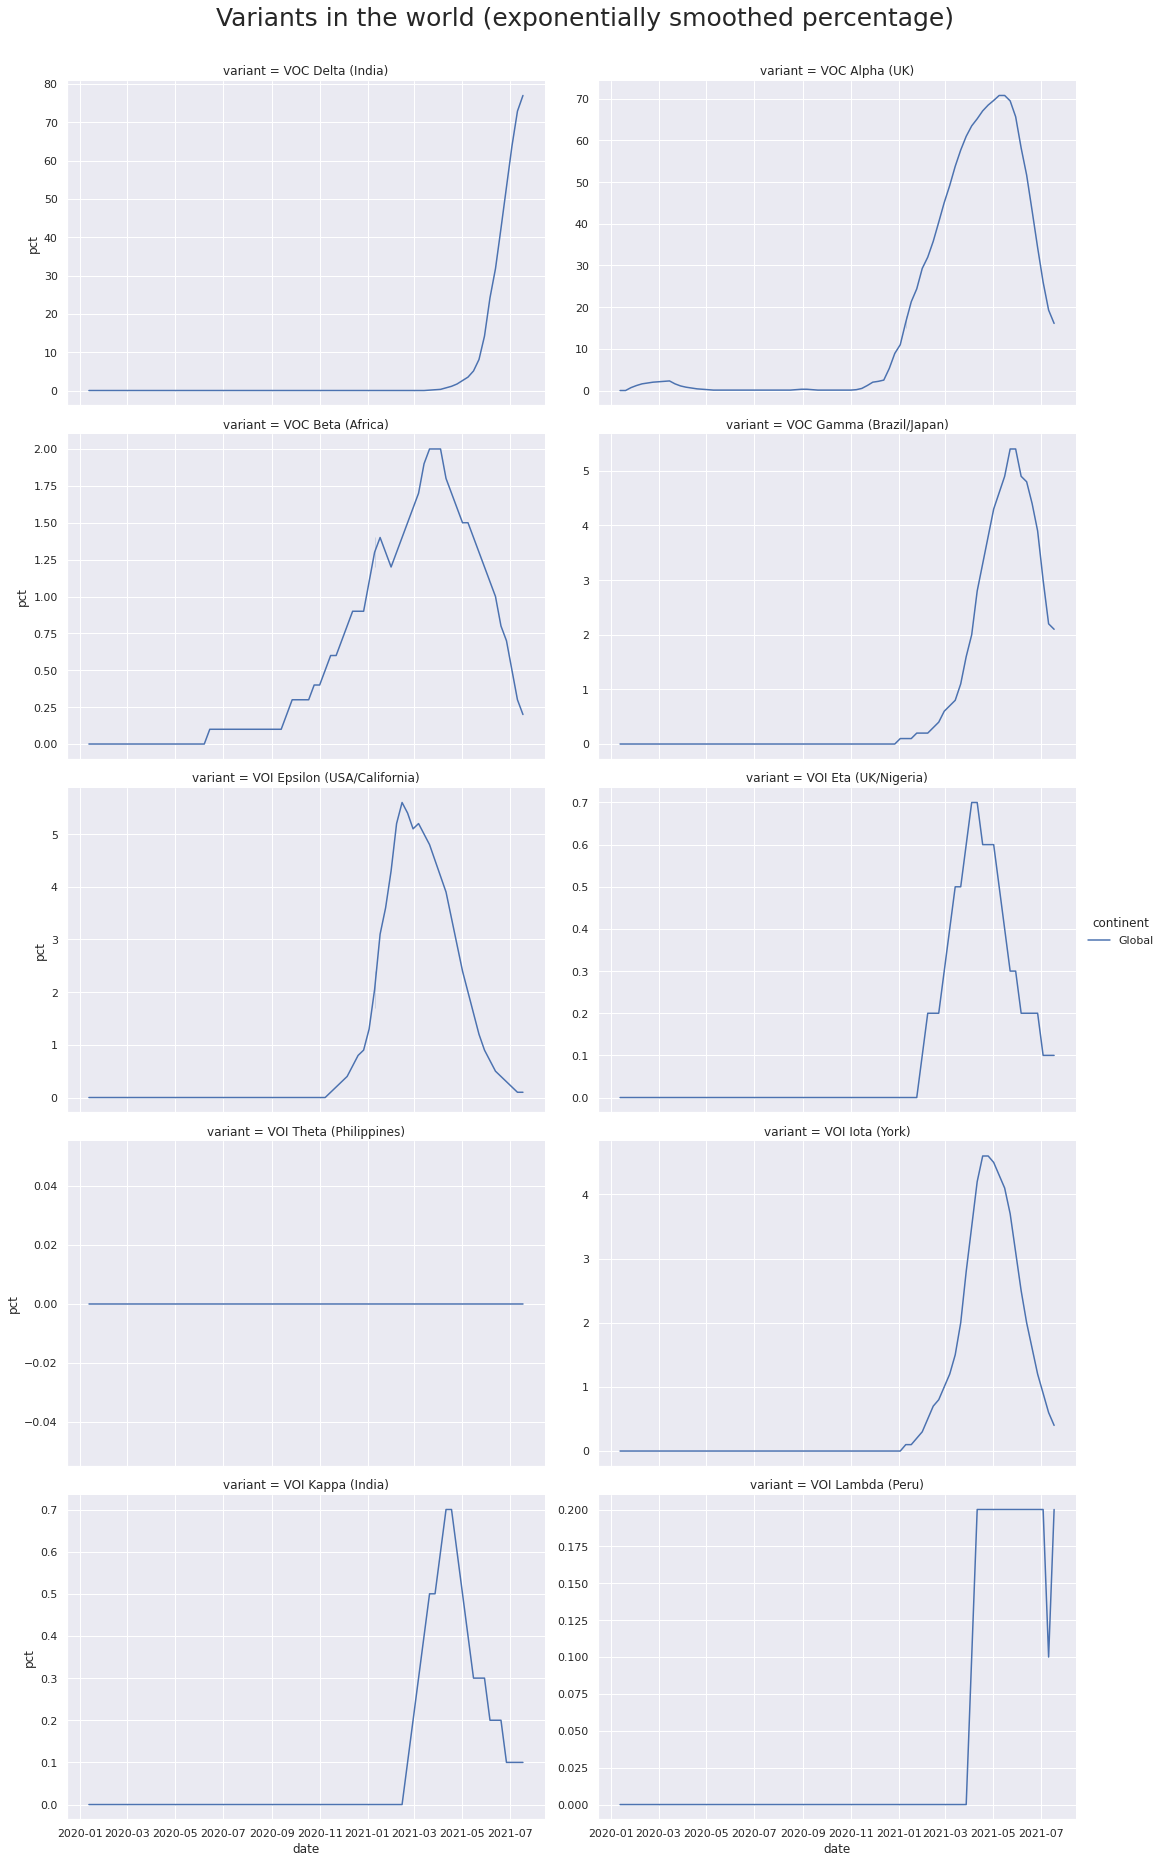

In [7]:
g = sns.relplot(
    kind='line',
    data=WWW[WWW.continent=='Global'],
    x='date', y='pct',
    hue='continent',
    col='variant',
    col_wrap=2,
    aspect=1.5,
    facet_kws=dict(sharey=False)
)
g.fig.suptitle('Variants in the world (exponentially smoothed percentage)', y=1.025, fontsize=25)
plt.show()